In [47]:
import pandas as pd
import censusdata
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import datetime
import numpy as np

In [6]:
sample.head()

AttributeError: 'list' object has no attribute 'head'

In [7]:
type(sample)

list

In [9]:
censusdata.printtable(censusdata.censustable('acs5', 2015, 'B23025'))

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B23025_001E  | B23025.  Employment Status for | Total:                                                   | int  
B23025_002E  | B23025.  Employment Status for | In labor force:                                          | int  
B23025_003E  | B23025.  Employment Status for | !! In labor force: Civilian labor force:                 | int  
B23025_004E  | B23025.  Employment Status for | !! !! In labor force: Civilian labor force: Employed     | int  
B23025_005E  | B23025.  Employment Status for | !! !! In labor force: Civilian labor force: Unemployed   | int  
B23025_006E  | B23025.  Employment Status for | !! In labor force: Armed Forces                          | int  
B23025_007E  | B23025.  Employment Status for | Not in labor force                           

In [16]:
"http://news.bbc.co.uk/2/shared/spl/hi/uk/06/prisons/html/nn2page1.stm"

table = pd.read_clipboard()
table.to_csv('world_prision_population.csv')

In [22]:
world_prision_population_df = pd.read_csv('world_prision_population.csv', thousands=',')

In [32]:
world_prision_population_df['% of Total Prison population'] = world_prision_population_df['Prison population'] / world_prision_population_df['Prison population'].sum()
world_prision_population_df['% of Total Population per 100,000'] = world_prision_population_df['Population per 100,000'] / world_prision_population_df['Population per 100,000'].sum()


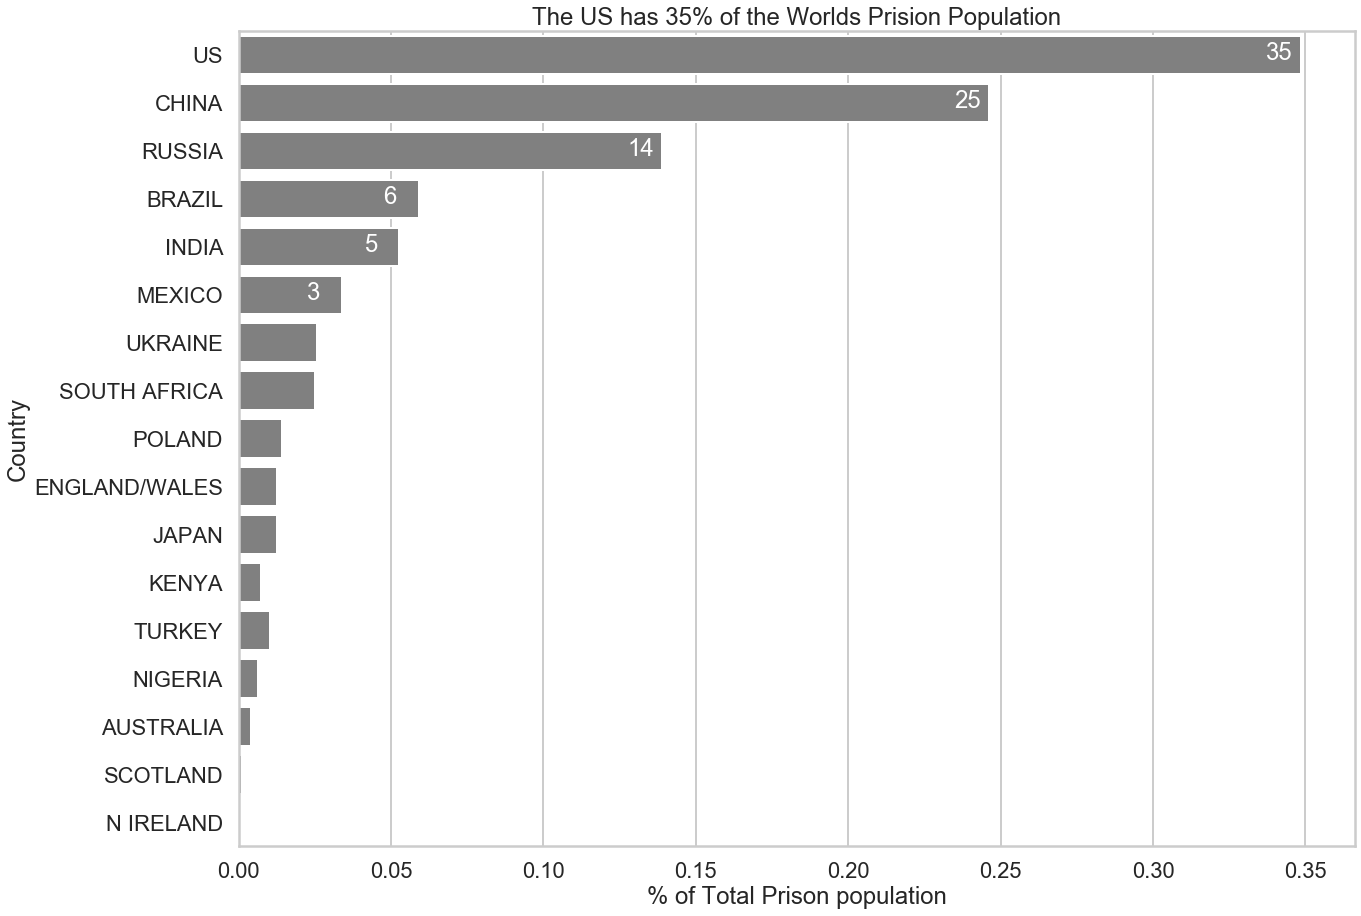

In [46]:
sns.set()

sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 1)
f, ax = plt.subplots(figsize=(20,15))

sns.barplot(data = world_prision_population_df, x='% of Total Prison population', y='Country', color='grey')

plt.title('The US has 35% of the Worlds Prision Population')

#data labels
for p in ax.patches:
    if p.get_width() < 0.03:
        pass
    else:
        ax.annotate("{:.0f}".format(p.get_width()*100), 
                    (p.get_width(), p.get_y()),
                    va='center', 
                    xytext=(-35, -18), #offset points so that the are inside the chart
                    textcoords='offset points', 
                    color = 'white')

plt.show()

In [55]:
#source = requests.get('https://www.worldometers.inffo/world-population/population-by-country/').text
#soup = BeautifulSoup(source, "lxml")

rows = soup.find_all("td")

In [68]:
#rows

In [80]:
table = soup.find_all('table')[0] 
df = pd.read_html(str(table))
world_population_df = df[0]

In [81]:
world_population_df.head()

# Country (or dependency)  Population (2020) Yearly Change  Net Change  \
0  1                   China         1439323776        0.39 %     5540090   
1  2                   India         1380004385        0.99 %    13586631   
2  3           United States          331002651        0.59 %     1937734   
3  4               Indonesia          273523615        1.07 %     2898047   
4  5                Pakistan          220892340        2.00 %     4327022   

   Density (P/Km²)  Land Area (Km²)  Migrants (net) Fert. Rate Med. Age  \
0              153          9388211       -348399.0        1.7       38   
1              464          2973190       -532687.0        2.2       28   
2               36          9147420        954806.0        1.8       38   
3              151          1811570        -98955.0        2.3       30   
4              287           770880       -233379.0        3.6       23   

  Urban Pop % World Share  
0        61 %     18.47 %  
1        35 %     17.70 %  
2        83 %      4.25 %  
3        56 %      3.51 %  
4        35 %      2.83 %